In [5]:
import sys
sys.path.append("../")

In [5]:

import delay.calculator as calc
from delay.delay import *
from delay.strategy import fA_Smooth, fB_Smooth, showSmoothFunctions

In [3]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/4*(math.tanh(-0.6*(x-d))+1)

    def fB(x):
        return N/4*(math.tanh(0.6*(x+d))+1)
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

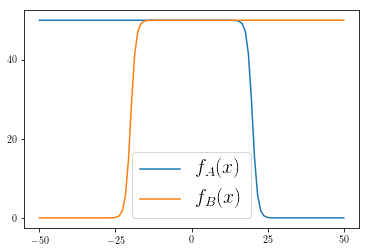

In [8]:
N = 100
showSmoothFunctions(fA_Smooth, fB_Smooth, N=N, d=20, omega=0.6)

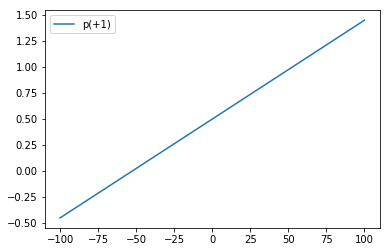

In [15]:
calculateProbability = calc.linear(100)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  0.1313629871248519


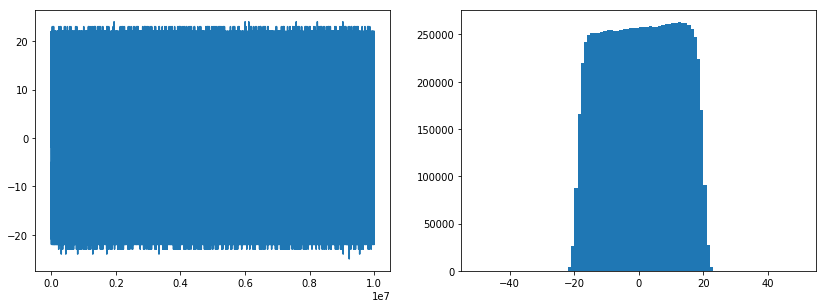

In [34]:
N = 100
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -2.2495853612319734


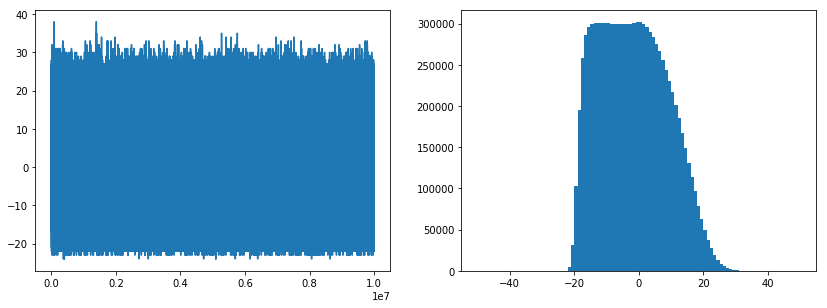

In [35]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  2.2523000702400924


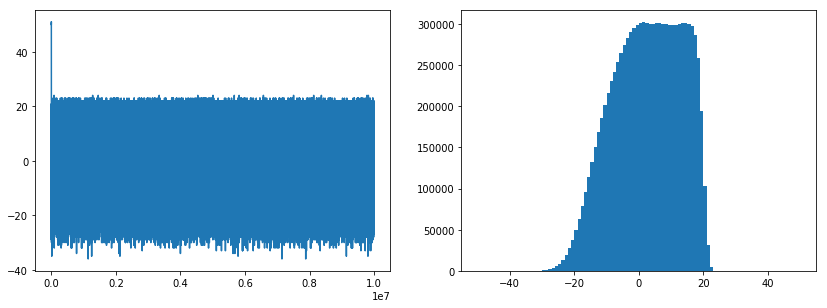

In [36]:
N = 100
tauA = 0
tauB = 20
x = [N/2] * 20 + [N/2 + 1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [37]:
N = 500
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 20000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 50
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  10 ,  -0.8174965259146616
50 ,  20 ,  -2.4337343912388425
50 ,  30 ,  -3.3817446677174434
50 ,  40 ,  -6.209947115109686
50 ,  50 ,  -6.876040655265711
50 ,  60 ,  -7.935831103623974
50 ,  70 ,  -8.904671520419743
50 ,  80 ,  -10.642390363675705
50 ,  90 ,  -11.207445130456465
50 ,  100 ,  -11.29412927567268
10 ,  50 ,  -7.138550352403458
20 ,  50 ,  -6.722344928961022
30 ,  50 ,  -6.670141840771264
40 ,  50 ,  -6.697339152637747
50 ,  50 ,  -6.480711200820976
60 ,  50 ,  -7.557747504271565
70 ,  50 ,  -7.576037167863924
80 ,  50 ,  -7.225333994097145
90 ,  50 ,  -7.439396544818992
100 ,  50 ,  -6.888316309553039


In [38]:
N = 500
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 10000 * N
conv = N
d = 150
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
150 ,  10 ,  -2.57807567966795
150 ,  20 ,  -11.104693621402877
150 ,  30 ,  -4.264474805665581
150 ,  40 ,  -8.349113482735
150 ,  50 ,  -13.26481924308211
150 ,  60 ,  -5.030324633780199
150 ,  70 ,  -11.891684836329603
150 ,  80 ,  -6.0588806167793345
150 ,  90 ,  -16.55325679213414
150 ,  100 ,  -17.749752782822007
10 ,  150 ,  -27.208054340709413
20 ,  150 ,  -23.486204624915732
30 ,  150 ,  -20.918321666568016
40 ,  150 ,  -34.905814851050515
50 ,  150 ,  -18.363119661598823
60 ,  150 ,  -26.14971270283172
70 ,  150 ,  -17.20954117905877
80 ,  150 ,  -28.91410437888035
90 ,  150 ,  -25.768560479877078
100 ,  150 ,  -21.97810893151473


In [39]:
N = 100
tauA = 0
tauB = 0
duration = 10000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:101]
    N = i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  50 ,  -0.447461043820589 ,  25.44746104382059
150 ,  150 ,  100 ,  -0.6208305601872846 ,  50.62083056018729
150 ,  150 ,  150 ,  4.7726013507030745 ,  70.22739864929693
150 ,  150 ,  200 ,  5.035413790421865 ,  94.96458620957813
150 ,  150 ,  250 ,  8.627970885248816 ,  116.37202911475119
150 ,  150 ,  300 ,  -16.406818757947022 ,  166.406818757947
150 ,  150 ,  350 ,  -1.44782260483502 ,  176.447822604835
150 ,  150 ,  400 ,  -27.086870588425402 ,  227.0868705884254
150 ,  150 ,  450 ,  -27.059902984494283 ,  252.05990298449427
150 ,  150 ,  500 ,  -1.8521639628703097 ,  251.85216396287032


In [40]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:101]
    N = 500 + i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  550 ,  -26.153450833726136 ,  301.15345083372614
150 ,  150 ,  600 ,  -22.844373423384692 ,  322.8443734233847
150 ,  150 ,  650 ,  -27.825682214412975 ,  352.82568221441295
150 ,  150 ,  700 ,  -14.558796758927867 ,  364.5587967589279
150 ,  150 ,  750 ,  -22.324013420818165 ,  397.3240134208182
150 ,  150 ,  800 ,  -22.39196444578265 ,  422.39196444578266
150 ,  150 ,  850 ,  -23.909526192346842 ,  448.90952619234685
150 ,  150 ,  900 ,  -24.23970128179244 ,  474.23970128179246
150 ,  150 ,  950 ,  -23.708852749072562 ,  498.70885274907255
150 ,  150 ,  1000 ,  -26.337365871646984 ,  526.337365871647
